**student:** Titouan Le Breton

# Importing packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1

### Question 1

We consider the longitudinal model. For individual $i \in \{1,\dots,N\}$ and measurement $j \in \{1,\dots,K\}$,
$$
y_{i,j} = d_i(t_{i,j}) + \varepsilon_{i,j}, \qquad
\varepsilon_{i,j} \overset{i.i.d}{\sim} \mathcal N(0,\sigma^2),
$$
with population trajectory
$$
d(t) = p_0 + v_0 (t - t_0),
$$
and individual trajectory
$$
d_i(t) = d\big(\alpha_i (t - t_0 - \tau_i) + t_0\big),
\qquad \alpha_i = \exp(\xi_i).
$$

We define the latent variables
$$
z = (z_{\text{pop}},z_1,\dots,z_N)
= (t_0,v_0,\xi_1,\tau_1,\dots,\xi_N,\tau_N).
$$

The parameters (in the sense of the Bayesian model) are
$$
\theta = (\bar t_0,\bar v_0,\sigma^2,\sigma_\xi^2,\sigma_\tau^2),
$$
and we treat $(p_0,\sigma_{t_0}^2,\sigma_{v_0}^2,s_{t_0}^2,s_{v_0}^2,v_\xi,m_\xi,v_\tau,m_\tau,v,m)$ as fixed hyperparameters.

The hierarchical priors are:
$$
t_0 \mid \bar t_0 \sim \mathcal N(\bar t_0,\sigma_{t_0}^2), \qquad
v_0 \mid \bar v_0 \sim \mathcal N(\bar v_0,\sigma_{v_0}^2),
$$
$$
\xi_i \mid \sigma_\xi^2 \sim \mathcal N(0,\sigma_\xi^2), \qquad
\tau_i \mid \sigma_\tau^2 \sim \mathcal N(0,\sigma_\tau^2),
$$
and, for the hypermeans,
$$
\bar t_0 \sim \mathcal N(\bar{\bar t}_0,s_{t_0}^2), \qquad
\bar v_0 \sim \mathcal N(\bar{\bar v}_0,s_{v_0}^2),
$$
while the variances have inverse-Wishart (inverse-Gamma type) priors
$$
\sigma_\xi^2 \sim \mathcal W^{-1}(v_\xi,m_\xi), \qquad
\sigma_\tau^2 \sim \mathcal W^{-1}(v_\tau,m_\tau), \qquad
\sigma^2 \sim \mathcal W^{-1}(v,m).
$$

The complete joint density factorizes as
$$
q(y,z,\theta) = q(y \mid z,\theta)\, q(z \mid \theta)\, q(\theta),
$$
so that
$$
\log q(y,z,\theta)
= \log q(y \mid z,\theta)
+ \log q(z \mid \theta)
+ \log q(\theta).
$$

Given $(z,\theta)$, the $y_{i,j}$ are independent with
$$
y_{i,j} \mid z,\theta \sim \mathcal N\big(d_i(t_{i,j}),\sigma^2\big),
$$
hence, up to an additive constant $c_1$,
$$
\log q(y \mid z,\theta)
= - \frac{1}{2} \sum_{i=1}^N \sum_{j=1}^K
\left\{
\log(\sigma^2)
+ \frac{(y_{i,j}-d_i(t_{i,j}))^2}{\sigma^2}
\right\}
= -\frac{NK}{2}\log\sigma^2
  -\frac{1}{2\sigma^2} \sum_{i,j} (y_{i,j}-d_i(t_{i,j}))^2 + c_1.
$$

We split $z = (z_{\text{pop}}, z_1,\dots,z_N)$ with $z_{\text{pop}}=(t_0,v_0)$ and $z_i=(\xi_i,\tau_i)$.

For the population (fixed) effects,
$$
q(z_{\text{pop}} \mid \theta)
= q(t_0,v_0 \mid \bar t_0,\bar v_0)
= \mathcal N(t_0;\bar t_0,\sigma_{t_0}^2)\, \mathcal N(v_0;\bar v_0,\sigma_{v_0}^2),
$$
so
$$
\log q(z_{\text{pop}} \mid \theta)
= -\frac{1}{2\sigma_{t_0}^2}(t_0-\bar t_0)^2
  -\frac{1}{2\sigma_{v_0}^2}(v_0-\bar v_0)^2 + c_2.
$$

For the random effects, using independence,
$$
q(z_i \mid \theta)
= q(\xi_i,\tau_i \mid \sigma_\xi^2,\sigma_\tau^2)
= \mathcal N(\xi_i;0,\sigma_\xi^2)\,\mathcal N(\tau_i;0,\sigma_\tau^2),
$$
so
$$
\log q(z_i \mid \theta)
= -\frac{1}{2}\log(\sigma_\xi^2) - \frac{\xi_i^2}{2\sigma_\xi^2}
  -\frac{1}{2}\log(\sigma_\tau^2) - \frac{\tau_i^2}{2\sigma_\tau^2} + c_3,
$$
and summing over $i$ gives
$$
\log q(z_1,\dots,z_N \mid \theta)
= -\frac{N}{2}\log(\sigma_\xi^2\sigma_\tau^2)
  -\frac{1}{2\sigma_\xi^2}\sum_{i=1}^N \xi_i^2
  -\frac{1}{2\sigma_\tau^2}\sum_{i=1}^N \tau_i^2 + c_3'.
$$

The Gaussian priors for $\bar t_0,\bar v_0$ give
$$
\log q(\bar t_0,\bar v_0)
= -\frac{1}{2s_{t_0}^2}(\bar t_0-\bar{\bar t}_0)^2
  -\frac{1}{2s_{v_0}^2}(\bar v_0-\bar{\bar v}_0)^2 + c_4.
$$
Each inverse-Wishart prior in 1D has a density of the form
$$
f_{W^{-1}}(\sigma^2)
= \frac{1}{\Gamma(m/2)}
  \left(\frac{v}{\sigma\sqrt{2}}\right)^m
  \exp\!\left(-\frac{v}{2\sigma^2}\right),
$$
so, up to constants,
$$
\log q(\sigma_\xi^2)
= -\frac{m_\xi}{2}\log(\sigma_\xi^2)
  -\frac{v_\xi}{2\sigma_\xi^2} + c_5,
$$
and similarly for $\sigma_\tau^2$ and $\sigma^2$:
$$
\log q(\sigma_\tau^2)
= -\frac{m_\tau}{2}\log(\sigma_\tau^2)
  -\frac{v_\tau}{2\sigma_\tau^2} + c_6,
$$
$$
\log q(\sigma^2)
= -\frac{m}{2}\log(\sigma^2)
  -\frac{v}{2\sigma^2} + c_7.
$$
Collecting,
$$
\log q(\theta)
= -\frac{1}{2s_{t_0}^2}(\bar t_0-\bar{\bar t}_0)^2
  -\frac{1}{2s_{v_0}^2}(\bar v_0-\bar{\bar v}_0)^2
  -\frac{m_\xi}{2}\log(\sigma_\xi^2)
  -\frac{v_\xi}{2\sigma_\xi^2}
  -\frac{m_\tau}{2}\log(\sigma_\tau^2)
  -\frac{v_\tau}{2\sigma_\tau^2}
  -\frac{m}{2}\log(\sigma^2)
  -\frac{v}{2\sigma^2} + c_8.
$$

Putting everything together, and absorbing into a generic constant $C$ all terms that do not depend on $\theta$, we obtain

$$
\begin{aligned}
\log q(y,z,\theta)
=&\;
-\frac{NK}{2}\log\sigma^2
-\frac{1}{2\sigma^2}\sum_{i,j}(y_{i,j}-d_i(t_{i,j}))^2
-\frac{N}{2}\log(\sigma_\xi^2\sigma_\tau^2)
-\frac{1}{2\sigma_\xi^2}\sum_{i=1}^N \xi_i^2
-\frac{1}{2\sigma_\tau^2}\sum_{i=1}^N \tau_i^2 \\
&\;
-\frac{1}{2\sigma_{t_0}^2}(t_0-\bar t_0)^2
-\frac{1}{2\sigma_{v_0}^2}(v_0-\bar v_0)^2
-\frac{1}{2s_{t_0}^2}(\bar t_0-\bar{\bar t}_0)^2
-\frac{1}{2s_{v_0}^2}(\bar v_0-\bar{\bar v_0})^2 \\
&\;
-\frac{m_\xi}{2}\log(\sigma_\xi^2)
-\frac{v_\xi}{2\sigma_\xi^2}
-\frac{m_\tau}{2}\log(\sigma_\tau^2)
-\frac{v_\tau}{2\sigma_\tau^2}
-\frac{m}{2}\log(\sigma^2)
-\frac{v}{2\sigma^2}
+ C.
\end{aligned}
$$


We now rewrite this in the exponential-family form. Define the sufficient statistics
$$
S_1(y,z) = \frac{1}{KN}\sum_{i=1}^N\sum_{j=1}^K (y_{i,j} - d_i(t_{i,j}))^2,\qquad
S_2(y,z) = \frac{1}{N}\sum_{i=1}^N \xi_i^2,
$$
$$
S_3(y,z) = \frac{1}{N}\sum_{i=1}^N \tau_i^2,\qquad
S_4(y,z) = v_0,\qquad
S_5(y,z) = t_0.
$$
Then
$$
-\frac{1}{2\sigma^2}\sum_{i,j}(y_{i,j}-d_i(t_{i,j}))^2
= -\frac{KN}{2\sigma^2} S_1(y,z),
$$
$$
-\frac{1}{2\sigma_\xi^2}\sum_{i=1}^N \xi_i^2
= -\frac{N}{2\sigma_\xi^2} S_2(y,z),
\qquad
-\frac{1}{2\sigma_\tau^2}\sum_{i=1}^N \tau_i^2
= -\frac{N}{2\sigma_\tau^2} S_3(y,z),
$$
and expanding the Gaussian terms on $t_0$ and $v_0$,
$$
-\frac{1}{2\sigma_{t_0}^2}(t_0-\bar t_0)^2
= -\frac{t_0^2}{2\sigma_{t_0}^2} + \frac{t_0\bar t_0}{\sigma_{t_0}^2}
  -\frac{\bar t_0^2}{2\sigma_{t_0}^2},
$$
$$
-\frac{1}{2\sigma_{v_0}^2}(v_0-\bar v_0)^2
= -\frac{v_0^2}{2\sigma_{v_0}^2} + \frac{v_0\bar v_0}{\sigma_{v_0}^2}
  -\frac{\bar v_0^2}{2\sigma_{v_0}^2}.
$$
The terms $t_0^2$ and $v_0^2$ have coefficients independent of $\theta$ (since $\sigma_{t_0}^2,\sigma_{v_0}^2$ are fixed hyperparameters) and can be absorbed into $C$. The only parts coupling $z$ and $\theta$ are
$$
\frac{\bar t_0}{\sigma_{t_0}^2} t_0 = \frac{\bar t_0}{\sigma_{t_0}^2} S_5(y,z), \qquad
\frac{\bar v_0}{\sigma_{v_0}^2} v_0 = \frac{\bar v_0}{\sigma_{v_0}^2} S_4(y,z).
$$

Thus all terms that depend simultaneously on $(y,z)$ and on $\theta$ can be written as
$$
\langle S(y,z), \Psi(\theta) \rangle
= S_1(y,z)\left(-\frac{KN}{2\sigma^2}\right)
+ S_2(y,z)\left(-\frac{N}{2\sigma_\xi^2}\right)
+ S_3(y,z)\left(-\frac{N}{2\sigma_\tau^2}\right)
+ S_4(y,z)\left(\frac{\bar v_0}{\sigma_{v_0}^2}\right)
+ S_5(y,z)\left(\frac{\bar t_0}{\sigma_{t_0}^2}\right),
$$
with
$$
S(y,z) = (S_1,S_2,S_3,S_4,S_5),
\qquad
\Psi(\theta)
=
\left(
-\frac{KN}{2\sigma^2},
-\frac{N}{2\sigma_\xi^2},
-\frac{N}{2\sigma_\tau^2},
\frac{\bar v_0}{\sigma_{v_0}^2},
\frac{\bar t_0}{\sigma_{t_0}^2}
\right).
$$

All the remaining terms (those depending only on $\theta$, plus the global constant) can be collected into a function $\Phi(\theta)$, so that we obtain the canonical form
$$
\log q(y,z;\theta)
= -\Phi(\theta) + \langle S(y,z), \Psi(\theta) \rangle.
$$

With: 
$$
\Phi(\theta)
=
\frac{NK}{2}\log\sigma^2
+ \frac{N}{2}\log(\sigma_\xi^2\sigma_\tau^2)
+ \frac{1}{2s_{t_0}^2}(\bar t_0-\bar{\bar t}_0)^2
+ \frac{1}{2s_{v_0}^2}(\bar v_0-\bar{\bar v}_0)^2
+ \frac{m_\xi}{2}\log(\sigma_\xi^2)
+ \frac{v_\xi}{2\sigma_\xi^2}
+ \frac{m_\tau}{2}\log(\sigma_\tau^2)
+ \frac{v_\tau}{2\sigma_\tau^2}
+ \frac{m}{2}\log(\sigma^2)
+ \frac{v}{2\sigma^2}
+ C

$$


### Question 2

In [7]:
HYPERPARAMS = {
    "p0": 10.0
}

THETA_PARAMS = {
    "bar_t0": 0.0,
    "bar_v0": 2.0,
    "sigma2": 0.1**2,
    "sigma_xi2": 0.3**2,
    "sigma_tau2": 0.5**2
}

def sample_z_and_y(N=10, K=100, hyper=HYPERPARAMS, theta=THETA_PARAMS, seed=None):
    if seed is not None:
        np.random.seed(seed)

    p0 = hyper["p0"]

    t0 = theta["bar_t0"]
    v0 = theta["bar_v0"]
    sigma2 = theta["sigma2"]
    sigma_xi2 = theta["sigma_xi2"]
    sigma_tau2 = theta["sigma_tau2"]

    t_grid = np.linspace(0.0, 10.0, K)

    xi  = np.random.normal(0.0, np.sqrt(sigma_xi2), N)
    tau = np.random.normal(0.0, np.sqrt(sigma_tau2), N)
    alpha = np.exp(xi)

    def d(t):
        return p0 + v0 * (t - t0)

    y = np.zeros((N, K))
    for i in range(N):
        t_eff = alpha[i] * (t_grid - t0 - tau[i]) + t0
        eps = np.random.normal(0.0, np.sqrt(sigma2), K)
        y[i] = d(t_eff) + eps

    z = {"t0": t0, "v0": v0, "xi": xi, "tau": tau, "alpha": alpha}
    return y, t_grid, z


t0 = 0.000, v0 = 2.000


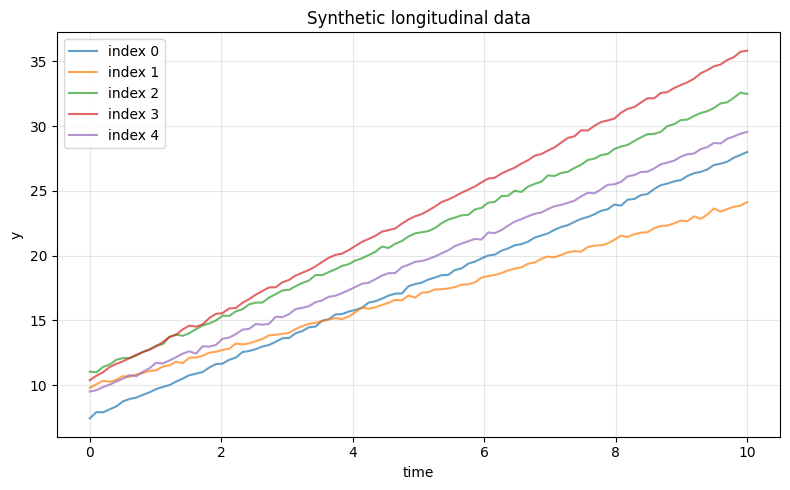

In [8]:
N, K = 10, 100
y, t_grid, z = sample_z_and_y(N=N, K=K)

print(f"t0 = {z['t0']:.3f}, v0 = {z['v0']:.3f}")

plt.figure(figsize=(8, 5))
for i in range(min(5, N)):
    plt.plot(t_grid, y[i], alpha=0.7, label=f"index {i}")

plt.xlabel("time")
plt.ylabel("y")
plt.title("Synthetic longitudinal data")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### Question 3

To compute the posterior density $\pi(z \mid y,\theta)$ needed in the Metropolis–Hastings sampler, we use
$$
\pi(z \mid y,\theta) \;\propto\; q(y \mid z,\theta)\, q(z \mid \theta),
$$
because the normalizing constant does not depend on $z$ and cancels in the acceptance ratio. From the observation model $y_{i,j}\mid z,\theta \sim \mathcal N(d_i(t_{i,j}),\sigma^2)$ we obtain
$$
\log q(y \mid z,\theta)
= -\frac{NK}{2}\log\sigma^2
  -\frac{1}{2\sigma^2}\sum_{i=1}^N\sum_{j=1}^K (y_{i,j}-d_i(t_{i,j}))^2
  + C_1.
$$
The prior on $z=(t_0,v_0,\xi_1,\tau_1,\dots,\xi_N,\tau_N)$ factorizes as
$$
t_0\mid \bar t_0 \sim \mathcal N(\bar t_0,\sigma_{t_0}^2),
\qquad
v_0\mid \bar v_0 \sim \mathcal N(\bar v_0,\sigma_{v_0}^2),
$$
$$
\xi_i \mid \sigma_\xi^2 \sim \mathcal N(0,\sigma_\xi^2),
\qquad
\tau_i \mid \sigma_\tau^2 \sim \mathcal N(0,\sigma_\tau^2).
$$
Thus
$$
\log q(z \mid \theta)
=
-\frac{(t_0-\bar t_0)^2}{2\sigma_{t_0}^2}
-\frac{(v_0-\bar v_0)^2}{2\sigma_{v_0}^2}
-\frac{1}{2\sigma_\xi^2}\sum_{i=1}^N \xi_i^2
-\frac{1}{2\sigma_\tau^2}\sum_{i=1}^N \tau_i^2
-\frac{N}{2}\log(\sigma_\xi^2\sigma_\tau^2)
+ C_2.
$$
Since the constants $C_1$ and $C_2$ do not depend on $z$, they are irrelevant for Metropolis–Hastings. Therefore, up to an additive constant,
$$
\log \pi(z \mid y,\theta)
=
-\frac{1}{2\sigma^2}\sum_{i,j}(y_{i,j}-d_i(t_{i,j}))^2
-\frac{(t_0-\bar t_0)^2}{2\sigma_{t_0}^2}
-\frac{(v_0-\bar v_0)^2}{2\sigma_{v_0}^2}
-\frac{1}{2\sigma_\xi^2}\sum_i \xi_i^2
-\frac{1}{2\sigma_\tau^2}\sum_i \tau_i^2
\; + \; \text{const}.
$$


In [ ]:
def log_posterior_z(z, y, t_grid, theta, hyper):
    # log π(z | y, θ) up to a constant
    N, K = y.shape
    t0, v0 = z[0], z[1]
    xi  = z[2:2+N]
    tau = z[2+N:2+2*N]

    p0         = hyper["p0"]
    sigma_t0   = hyper["sigma_t0"]
    sigma_v0   = hyper["sigma_v0"]
    bar_t0     = theta["bar_t0"]
    bar_v0     = theta["bar_v0"]
    sigma2     = theta["sigma2"]
    sigma_xi2  = theta["sigma_xi2"]
    sigma_tau2 = theta["sigma_tau2"]

    # likelihood
    alpha = np.exp(xi)
    t_eff = alpha.reshape(-1,1) * (t_grid.reshape(1,-1) - t0 - tau.reshape(-1,1)) + t0
    mean_y = p0 + v0 * (t_eff - t0)
    rss = np.sum((y - mean_y)**2)
    log_like = -0.5 * rss / sigma2

    # priors
    lp = -0.5*(t0-bar_t0)**2/(sigma_t0**2)
    lp += -0.5*(v0-bar_v0)**2/(sigma_v0**2)
    lp += -0.5*np.sum(xi**2)/sigma_xi2
    lp += -0.5*np.sum(tau**2)/sigma_tau2

    return log_like + lp


def mh_sampler_z(y, t_grid, theta, hyper,
                 n_iter=3000, prop_scale=0.05, init_z=None):
    # Simple symmetric RW Metropolis
    N, K = y.shape
    d = 2*N + 2

    if init_z is None:
        t0_0 = theta["bar_t0"]
        v0_0 = theta["bar_v0"]
        xi0  = np.zeros(N)
        tau0 = np.zeros(N)
        z_cur = np.concatenate(([t0_0, v0_0], xi0, tau0))
    else:
        z_cur = init_z.copy()

    chain = np.zeros((n_iter, d))
    chain[0] = z_cur
    logpi_cur = log_posterior_z(z_cur, y, t_grid, theta, hyper)
    acc = 0

    for k in range(1, n_iter):
        z_prop = z_cur + prop_scale * np.random.normal(size=d)
        logpi_prop = log_posterior_z(z_prop, y, t_grid, theta, hyper)

        if np.log(np.random.rand()) < (logpi_prop - logpi_cur):
            z_cur = z_prop
            logpi_cur = logpi_prop
            acc += 1

        chain[k] = z_cur

    burnin = n_iter // 2
    return chain[burnin:], acc / n_iter


# ---------------- TEST ----------------

# # simple data for testing
# N, K = 5, 40
# t_grid = np.linspace(0, 10, K)

# hyper = {"p0":10.0, "sigma_t0":1.0, "sigma_v0":1.0}
# theta  = {"bar_t0":0.0, "bar_v0":2.0, "sigma2":0.1**2,
#           "sigma_xi2":0.3**2, "sigma_tau2":0.5**2}

# # generate synthetic y
# t0 = np.random.normal(theta["bar_t0"], hyper["sigma_t0"])
# v0 = np.random.normal(theta["bar_v0"], hyper["sigma_v0"])
# xi = np.random.normal(0, np.sqrt(theta["sigma_xi2"]), size=N)
# tau = np.random.normal(0, np.sqrt(theta["sigma_tau2"]), size=N)
# alpha = np.exp(xi)

# t_eff = alpha.reshape(-1,1)*(t_grid.reshape(1,-1)-t0-tau.reshape(-1,1))+t0
# mean_y = hyper["p0"] + v0*(t_eff - t0)
# y = mean_y + np.random.normal(0, np.sqrt(theta["sigma2"]), size=(N,K))

# # run MH
# samples, acc = mh_sampler_z(y, t_grid, theta, hyper,
#                             n_iter=2000, prop_scale=0.03)

# print("Acceptance rate:", acc)
# print("Posterior mean t0:", samples[:,0].mean())
# print("Posterior mean v0:", samples[:,1].mean())


Acceptance rate: 0.0545
Posterior mean t0: -1.6543366188002364
Posterior mean v0: 2.2145781685521633


### Question 4